<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/2.3_Independent%20Variables%20and%20Random%20Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Independent Variables and Random Samples

A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment. We will discuss both discrete and continuous probability distributions.

### 2.3.1 Joint Probability Distributions


In real life, we are often interested in several random variables that are re- lated to each other. Joint probability is the probability of two or more events happening together. A joint probability distribution shows a probability dis- tribution for two (or more) random variables.

#### 2.3.1.1 Two Discrete Random Variables

In this subsection, we discuss how to compute the joint probability distribution for two discrete random variables and derive marginal distributions.

---
**Definition (Joint PMF):**

Let $X$ and $Y$ be two discrete random variables. The joint probability mass function (PMF) is defined as:

$$ p(x, y) = P(X = x \, \text{and} \, Y = y) $$

where $p(x, y) \geq 0$ and:

$$ \sum_x \sum_y p(x, y) = 1 $$

---

**Definition (Marginal PMF):**

The marginal probability mass function of $X$, denoted by $p_X(x)$, is:

$$ p_X(x) = \sum_y p(x, y) $$

Similarly, the marginal probability mass function of $Y$, denoted by $p_Y(y)$, is:

$$ p_Y(y) = \sum_x p(x, y) $$

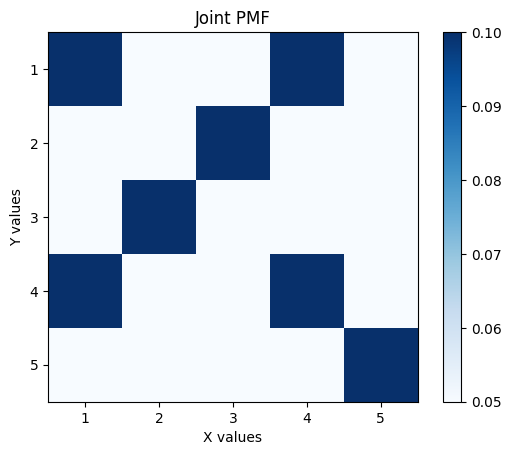

Marginal PMF of X: [0.35 0.3  0.3  0.35 0.3 ]
Marginal PMF of Y: [0.35 0.3  0.3  0.35 0.3 ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Joint PMF for two discrete random variables
x_values = [1, 2, 3, 4, 5]
y_values = [1, 2, 3, 4, 5]
joint_pmf = np.array([[0.1, 0.05, 0.05, 0.1, 0.05],
                      [0.05, 0.05, 0.1, 0.05, 0.05],
                      [0.05, 0.1, 0.05, 0.05, 0.05],
                      [0.1, 0.05, 0.05, 0.1, 0.05],
                      [0.05, 0.05, 0.05, 0.05, 0.1]])

# Marginal PMFs
marginal_x = np.sum(joint_pmf, axis=1)
marginal_y = np.sum(joint_pmf, axis=0)

# Plot joint PMF as a heatmap
plt.imshow(joint_pmf, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Joint PMF")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.xticks(np.arange(len(x_values)), x_values)
plt.yticks(np.arange(len(y_values)), y_values)
plt.show()

# Print marginal distributions
print("Marginal PMF of X:", marginal_x)
print("Marginal PMF of Y:", marginal_y)


#### 2.3.1.2 Two Continuous Random Variables

In this subsection, we explain the concept of joint probability density for continuous random variables and how to compute probabilities and marginal distributions.

---

**Definition (Joint PDF):**

For two continuous random variables $X$ and $Y$, the joint probability density function (PDF) is defined as:

$$ f(x, y) \geq 0 $$

and:

$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, dx \, dy = 1 $$

For any two-dimensional region $A$, the probability that $(X, Y)$ falls within $A$ is:

$$ P[(X, Y) \in A] = \int \int_A f(x, y) \, dx \, dy $$

---

**Definition (Marginal PDF):**

The marginal probability density function of $X$ is:

$$ f_X(x) = \int_{-\infty}^{\infty} f(x, y) \, dy $$

Similarly, the marginal PDF of $Y$ is:

$$ f_Y(y) = \int_{-\infty}^{\infty} f(x, y) \, dx $$


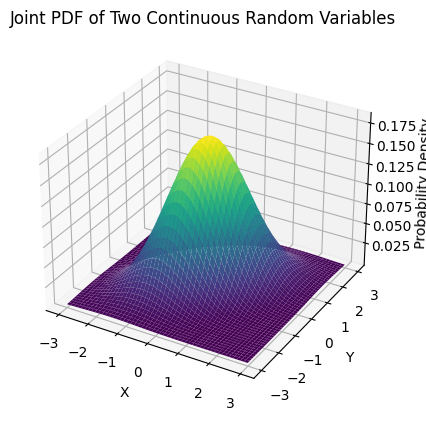

In [3]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

# Generate grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Parameters for the joint normal distribution
mu = [0, 0]  # mean
cov = [[1.0, 0.5], [0.5, 1.0]]  # covariance matrix

# Create joint PDF
rv = multivariate_normal(mu, cov)
joint_pdf = rv.pdf(pos)

# 3D plot of the joint PDF
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, joint_pdf, cmap='viridis')

ax.set_title("Joint PDF of Two Continuous Random Variables")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.show()


#### 2.3.1.3 Independent Random Variables

This subsection describes how two or more random variables are considered independent if their joint distribution is the product of their marginal distributions.

---

**Definition (Independence for Two Discrete Random Variables):**

Two discrete random variables $X$ and $Y$ are independent if:

$$ p(x, y) = p_X(x) \cdot p_Y(y) $$

for all values of $x$ and $y$.

---

**Definition (Independence for Two Continuous Random Variables):**

Two continuous random variables $X$ and $Y$ are independent if:

$$ f(x, y) = f_X(x) \cdot f_Y(y) $$

for all values of $x$ and $y$.

---

**Definition (Joint PMF/PDF for Multiple Random Variables):**

If $X_1, X_2, \dots, X_n$ are all discrete random variables, the joint PMF of the variables is the function:

$$ p(x_1, x_2, \dots, x_n) = P(X_1 = x_1, X_2 = x_2, \dots, X_n = x_n) $$

If the variables are continuous, the joint PDF of $X_1, \dots, X_n$ is the function $f(x_1, x_2, \dots, x_n)$ such that for any $n$ intervals $[a_1, b_1], \dots, [a_n, b_n]$:

$$ P(a_1 \leq X_1 \leq b_1, \dots, a_n \leq X_n \leq b_n) = \int_{a_1}^{b_1} \dots \int_{a_n}^{b_n} f(x_1, \dots, x_n) dx_n \dots dx_1 $$

---

**Definition (Independence of Multiple Random Variables):**

The random variables $X_1, X_2, \dots, X_n$ are said to be independent if for every subset $X_{i_1}, X_{i_2}, \dots, X_{i_k}$ of the variables (each pair, each triple, and so on), the joint PMF or PDF of the subset is equal to the product of the marginal PMFs or PDFs.

In [5]:
# Independent random variables
x_values = [1, 2, 3]
y_values = [1, 2, 3]

# Joint PMF of two random variables (assuming independence)
joint_pmf_independent = np.outer([0.3, 0.5, 0.2], [0.4, 0.3, 0.3])

# Marginal PMFs (should be the same as given for independent variables)
marginal_x = np.sum(joint_pmf_independent, axis=1)
marginal_y = np.sum(joint_pmf_independent, axis=0)

# Check independence condition
joint_pmf_check = np.outer(marginal_x, marginal_y)

print("Joint PMF assuming independence:\n", joint_pmf_independent)
print("Computed Joint PMF from marginals:\n", joint_pmf_check)


Joint PMF assuming independence:
 [[0.12 0.09 0.09]
 [0.2  0.15 0.15]
 [0.08 0.06 0.06]]
Computed Joint PMF from marginals:
 [[0.12 0.09 0.09]
 [0.2  0.15 0.15]
 [0.08 0.06 0.06]]


### 2.3.2 Correlation and Dependence

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. Covariance is a measure of the joint vari- ability of two random variables.

#### 2.3.2.1 Correlation For Random Variables

This subsection explains how to quantify the relationship between two random variables using covariance and the correlation coefficient.

---

**Definition (Covariance):**

The covariance between two random variables $X$ and $Y$ is:

$$ \text{Cov}(X, Y) = E[(X - \mu_X)(Y - \mu_Y)] $$

where $\mu_X = E(X)$ and $\mu_Y = E(Y)$.

For discrete random variables:

$$ \text{Cov}(X, Y) = \sum_x \sum_y (x - \mu_X)(y - \mu_Y) p(x, y) $$

For continuous random variables:

$$ \text{Cov}(X, Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x - \mu_X)(y - \mu_Y) f(x, y) \, dx \, dy $$

---

**Definition (Correlation Coefficient):**

The correlation coefficient $\rho_{X,Y}$ between two random variables $X$ and $Y$ is defined as:

$$ \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$

where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

---

**Proposition (Properties of the Correlation Coefficient):**

1. If $X$ and $Y$ are independent, then $\rho_{X,Y} = 0$, but $\rho_{X,Y} = 0$ does not necessarily imply independence.
2. The correlation coefficient satisfies: $-1 \leq \rho_{X,Y} \leq 1$.
3. If $Y = aX + b$ for some constants $a \neq 0$ and $b$, then:
   - $\rho = 1$ if $a > 0$
   - $\rho = -1$ if $a < 0$

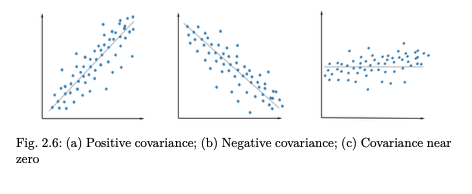

Covariance: 2.169865616574274
Correlation Coefficient: 0.9006752160894267


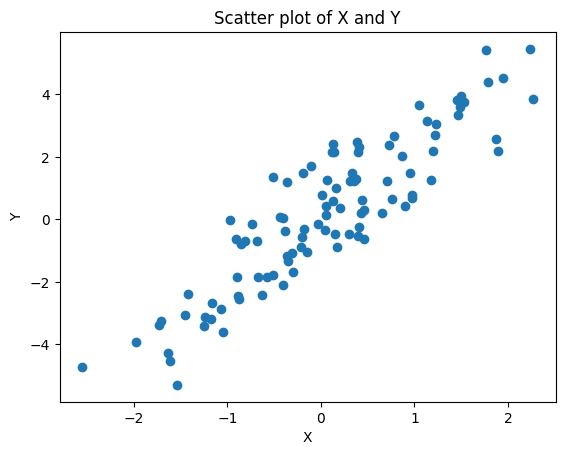

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.randn(100)
Y = 2 * X + np.random.randn(100)  # Positive correlation

# Compute covariance and correlation
covariance = np.cov(X, Y)[0, 1]
correlation = np.corrcoef(X, Y)[0, 1]

print(f"Covariance: {covariance}")
print(f"Correlation Coefficient: {correlation}")

plt.scatter(X, Y)
plt.title("Scatter plot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### 2.3.2.2 Correlation For Samples

This subsection explains how to compute the sample correlation coefficient, which estimates the correlation between two random variables based on observed sample data.

---

**Definition (Sample Correlation Coefficient):**

Given $n$ paired data points $(x_1, y_1), \dots, (x_n, y_n)$, the sample correlation coefficient, denoted as $r_{xy}$, is:

$$ r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} $$

where:

- $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ is the sample mean of $x$
- $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ is the sample mean of $y$

---

**Proposition (Properties of the Sample Correlation Coefficient):**

The sample correlation coefficient $r_{xy}$ has the following properties:

1. The sample correlation coefficient satisfies: $-1 \leq r_{xy} \leq 1$.
2. If $y_i = ax_i + b$ for some constants $a$ and $b$, then $r_{xy} = 1$ if $a > 0$, and $r_{xy} = -1$ if $a < 0$.
3. $r_{xy}$ reflects the strength and direction of the linear relationship between the sample data, but it does not indicate the slope of that relationship nor capture any non-linear relationships.

---

**Formula for Sample Covariance and Standard Deviation:**

The sample covariance $s_{xy}$ and the sample standard deviations $s_x$ and $s_y$ are related to the sample correlation coefficient by:

$$ r_{xy} = \frac{s_{xy}}{s_x s_y} $$

where:

- $s_{xy} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$ (sample covariance)
- $s_x = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$ (sample standard deviation of $x$)
- $s_y = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (y_i - \bar{y})^2}$ (sample standard deviation of $y$)

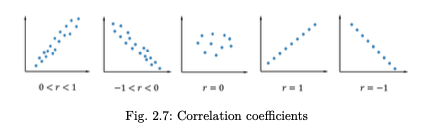

In [8]:
import numpy as np

X_sample = np.array([-2, -1, 0, 1, 2])
Y_sample = np.array([4, 1, 3, 2, 0])

# Calculate correlation using NumPy
correlation_matrix = np.corrcoef(X_sample, Y_sample)
print("Correlation matrix:\n", correlation_matrix)

# Pearson correlation coefficient
pearson_corr = correlation_matrix[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


Correlation matrix:
 [[ 1.  -0.7]
 [-0.7  1. ]]
Pearson correlation coefficient: -0.7


### 2.3 Random Samples

#### 2.3.3.1 Random Samples

This subsection discusses the concept of a random sample, where a set of random variables is independent and identically distributed (i.i.d.). It also describes how the sample mean is used to estimate the population mean.

---

**Definition (Random Sample):**

A set of random variables $X_1, X_2, \dots, X_n$ is said to form a (simple) random sample if:

1. The $X_i$'s are independent random variables.
2. Each $X_i$ has the same probability distribution.

---

**Definition (Sample Mean):**

The sample mean $\bar{X}$ is defined as:

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

The sample mean $\bar{X}$ is used to estimate the population mean $\mu$, and it has the following properties:

- The expected value of the sample mean is $E(\bar{X}) = \mu$.
- The variance of the sample mean is $V(\bar{X}) = \frac{\sigma^2}{n}$, where $\sigma^2$ is the population variance.

---

**Proposition (Sample Total):**

Let $X_1, X_2, \dots, X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Then:

1. The expected value of the sample mean $\bar{X}$ is equal to the population mean:
   $$ E(\bar{X}) = \mu $$

2. The variance of the sample mean $\bar{X}$ is:
   $$ V(\bar{X}) = \frac{\sigma^2}{n} $$

   where $\sigma^2$ is the population variance.

3. The sample total, $T_n = X_1 + X_2 + \dots + X_n$, has expected value and variance:
   $$ E(T_n) = n\mu $$
   $$ V(T_n) = n\sigma^2 $$

4. The standard deviation of the sample total $T_n$ is:
   $$ \sigma_{T_n} = \sqrt{n} \sigma $$

These properties are crucial for making inferences about the population from a sample.

In [10]:
import numpy as np

n = 100
random_sample = np.random.normal(loc=50, scale=10, size=n)

# Calculate sample mean and variance
sample_mean = np.mean(random_sample)
sample_variance = np.var(random_sample, ddof=1)  # Unbiased estimator with n-1

print(f"Sample Mean: {sample_mean}")
print(f"Sample Variance: {sample_variance}")


Sample Mean: 48.032032934540894
Sample Variance: 87.24251889899438


#### 2.3.3.2 The Central Limit Theorem

This subsection introduces the Central Limit Theorem (CLT), which explains that the sample mean of a large random sample is approximately normally distributed, even if the underlying distribution is not normal.

---

**Theorem (Central Limit Theorem):**

Let $X_1, X_2, \dots, X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Then, as the sample size $n$ increases, the sample mean $\bar{X}$ approaches a normal distribution:

$$ \bar{X} \sim N\left( \mu, \frac{\sigma^2}{n} \right) $$

In particular, the sum of the sample values, $T_n = X_1 + X_2 + \dots + X_n$, also approaches a normal distribution:

$$ T_n \sim N(n\mu, n\sigma^2) $$

As $n$ increases, the approximation becomes more accurate. This is known as the **Central Limit Theorem** and is fundamental in statistical inference.

---

**Remarks:**

1. The Central Limit Theorem holds even if the original distribution of the $X_i$'s is not normal, as long as $n$ is sufficiently large.
2. The larger the sample size $n$, the better the approximation to the normal distribution.

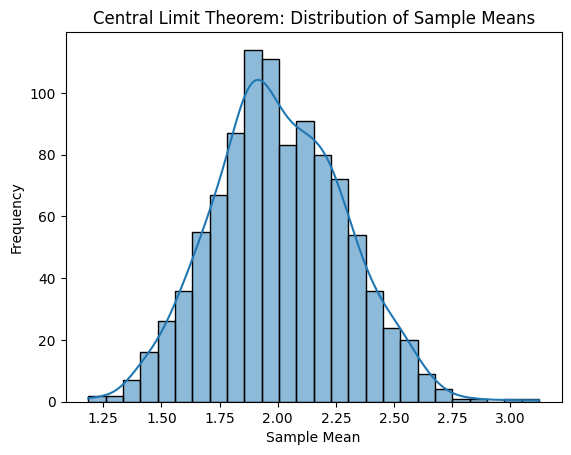

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lambda_param = 0.5  # Rate parameter

# Generate a large number of sample means
n_samples = 1000
sample_size = 50
sample_means = []

for _ in range(n_samples):
    sample = np.random.exponential(scale=1/lambda_param, size=sample_size)
    sample_means.append(np.mean(sample))

# Plot distribution of sample means
sns.histplot(sample_means, kde=True)
plt.title("Central Limit Theorem: Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()
